In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Reshape
from keras.layers.recurrent import GRU
from keras.optimizers import Adam
import numpy as np
import random
import sys
import os
import codecs
import collections
from six.moves import cPickle
import math

Using TensorFlow backend.


In [3]:
filenames_a = []
filenames_b = []
for i in range(1,101):
    if i<9:
        name_a = 'Z00'+str(i)+'.txt'
        name_b = 'O00'+str(i)+'.txt'
    elif i<100 and i>9:
        name_a = 'Z0'+str(i)+'.txt'
        name_b = 'O0'+str(i)+'.txt'
    else:
        name_a = 'Z100.txt'
        name_b = 'O100.txt'
    filenames_a.append(name_a)
    filenames_b.append(name_b)

print len(filenames_a)
print len(filenames_b)

100
100


In [4]:
'''with open('total_data_a.txt', 'w') as outfile:
    for fname in filenames_a:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)'''
X_a = np.genfromtxt('total_data_a.txt')
X_b = np.genfromtxt('total_data_b.txt')
#len(X)

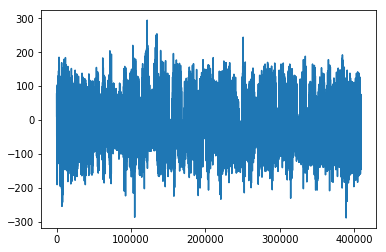

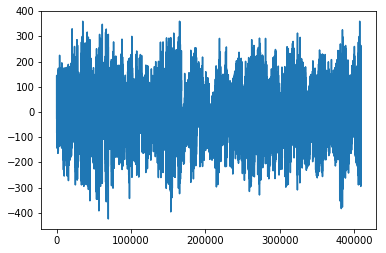

In [5]:
%matplotlib inline
plt.plot(X_a)
plt.show()
plt.plot(X_b)
plt.show()

In [6]:
print len(X_a)
print len(X_b)

409700
409700


In [7]:
"""
win_size =80
sub_segments = len(X)/win_size
x_labels = []
i=0
while i<len(X):
    if i+win_size > len(X):
        win_size = len(X)-i
    a = X[i:i+win_size]
    b=[]
    for c in a:
        b.append(c)
    x_labels.append(b)
    #y_labels.append(0)
    i = i+win_size
    
#print len(x_labels)    
x_labels = x_labels[0:len(x_labels)-1]
y_labels = np.zeros((len(x_labels),3))

#print y_labels.shape
data_x_labels = np.zeros((len(x_labels)+1,81,1))
print data_x_labels.shape

#len(x_labels)
#for i in range(len(x_labels)):
#    print len(x_labels[i])
print x_labels
"""
win_size =80
sub_segments = len(X_a)/win_size
xa_labels = []
xb_labels = []
i=0
while i<len(X_a):
    if i+win_size > len(X_a):
        win_size = len(X_a)-i
    a = X_a[i:i+win_size]
    b = X_b[i:i+win_size]
    xa_labels.append(a)
    xb_labels.append(b)
    i = i+win_size
    
xa_labels = xa_labels[0:len(xa_labels)-1]
#print len(xa_labels)
xb_labels = xb_labels[0:len(xb_labels)-1]
#print len(xb_labels)
y_labels = np.zeros((2*len(xa_labels),2))
data_x_labels = np.zeros((2*len(xa_labels),80,1))
#print data_x_labels.shape
m=0
for i in range(len(xa_labels)):
    for j in range(len(xa_labels[0])):
        data_x_labels[i][j] = xa_labels[i][j]
    y_labels[i][0] = 1
    m=i
m = m+1
#print m
for i in range(len(xb_labels)):
    for j in range(len(xb_labels[0])):
        data_x_labels[m+i][j] = xb_labels[i][j]
    y_labels[m+i][1] = 1
    
#print data_x_labels
print y_labels

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
len(xa_labels)

5121

In [9]:
learning_rate = 0.01
epochs = 300

In [10]:
model = Sequential()
model.add(GRU(units=100, input_shape=(80, 1)))
model.add(Dense(units=100, activation='relu'))
model.add(Reshape((100, 1)))
model.add(GRU(units=100))
model.add(Dense(units=2))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
print data_x_labels.shape
print y_labels.shape

(10242, 80, 1)
(10242, 2)


In [12]:
model.fit(data_x_labels,y_labels,epochs=epochs)

Epoch 1/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.6285
Epoch 2/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.5780
Epoch 3/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.5152
Epoch 4/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.5033
Epoch 5/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.4812
Epoch 6/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.4760
Epoch 7/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.4699
Epoch 8/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.4656
Epoch 9/300
10242/10242 [==============================] - 30s 3ms/step - loss: 0.4612
Epoch 10/300
10242/10242 [==============================] - 34s 3ms/step - loss: 0.4573
Epoch 11/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.4503
Epoch 12/300
10242/10242 [===============

10242/10242 [==============================] - 32s 3ms/step - loss: 0.0703
Epoch 94/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0982
Epoch 95/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0891
Epoch 96/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0795
Epoch 97/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0716
Epoch 98/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0923
Epoch 99/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0709
Epoch 100/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0965
Epoch 101/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.0895
Epoch 102/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.0697
Epoch 103/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.0874
Epoch 104/300
10242/10242 [==============

Epoch 185/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0674
Epoch 186/300
10242/10242 [==============================] - 29s 3ms/step - loss: 0.0525
Epoch 187/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0499
Epoch 188/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0559
Epoch 189/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0817
Epoch 190/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0719
Epoch 191/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.1359
Epoch 192/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.1361
Epoch 193/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0853
Epoch 194/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0559
Epoch 195/300
10242/10242 [==============================] - 28s 3ms/step - loss: 0.0599
Epoch 196/300
10242/1

Epoch 277/300
10242/10242 [==============================] - 31s 3ms/step - loss: 0.0872
Epoch 278/300
10242/10242 [==============================] - 32s 3ms/step - loss: 0.0853
Epoch 279/300
10242/10242 [==============================] - 30s 3ms/step - loss: 0.0779
Epoch 280/300
10242/10242 [==============================] - 39s 4ms/step - loss: 0.0766
Epoch 281/300
10242/10242 [==============================] - 30s 3ms/step - loss: 0.0590
Epoch 282/300
10242/10242 [==============================] - 29s 3ms/step - loss: 0.0956
Epoch 283/300
10242/10242 [==============================] - 29s 3ms/step - loss: 0.0744
Epoch 284/300
10242/10242 [==============================] - 29s 3ms/step - loss: 0.0581
Epoch 285/300
10242/10242 [==============================] - 29s 3ms/step - loss: 0.0382
Epoch 286/300
10242/10242 [==============================] - 29s 3ms/step - loss: 0.0452
Epoch 287/300
10242/10242 [==============================] - 30s 3ms/step - loss: 0.0688
Epoch 288/300
10242/1

In [13]:
X_a = np.genfromtxt('total_data_c.txt')
win_size =80
sub_segments = len(X_a)/win_size
xa_labels = []
i=0
while i<len(X_a):
    if i+win_size > len(X_a):
        win_size = len(X_a)-i
    a = X_a[i:i+win_size]
    xa_labels.append(a)
    i = i+win_size
    
xa_labels = xa_labels[0:len(xa_labels)-1]
#print len(xa_labels)
#print len(xb_labels)
ytest_labels = np.zeros((len(xa_labels),2))
test_x_labels = np.zeros((len(xa_labels),80,1))
#print data_x_labels.shape
for i in range(len(xa_labels)):
    for j in range(len(xa_labels[0])):
        data_x_labels[i][j] = xa_labels[i][j]
    ytest_labels[i][1] = 1
    

In [16]:
testPredict = model.predict(test_x_labels)
print testPredict

[[9.9981195e-01 1.8806208e-04]
 [9.9981195e-01 1.8806208e-04]
 [9.9981195e-01 1.8806208e-04]
 ...
 [9.9981195e-01 1.8806208e-04]
 [9.9981195e-01 1.8806208e-04]
 [9.9981195e-01 1.8806172e-04]]


In [19]:
trainScore = model.evaluate(data_x_labels, y_labels, verbose=0)
print 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore))
testScore = model.evaluate(test_x_labels, ytest_labels, verbose=0)
print 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore))

Train Score: 0.52 MSE (0.72 RMSE)
Test Score: 8.58 MSE (2.93 RMSE)


Author : Aishwarya Bhave